In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
class vertex:
    def __init__(self,x,y, name = None):
        self.x = x
        self.y = y
        self.name = name
    
    def __repr__(self):
        return f'({self.x},{self.y})'
    
    def __str__(self):
        return self.name

class semi_edge:
    def __init__(self, v1 ,v2, twin = None, next_a = None, prev_a = None, name = None):
        self.ini = v1
        self.fin = v2
        self.twin = twin
        self.next_a = next_a
        self.prev_a = prev_a
        self.name = name
        
    
    def __repr__(self):
        return f'{self.ini} ---> {self.fin}'
                 
                 
    def __str__(self):
        return self.name

class dc_edge:
    def __init__(self, p):
        self.v = [vertex(x[0], x[1]) for x in p]
        aux = self.v.copy()
        aux.append(aux.pop(0))
        aux = [*zip(self.v, aux)]
        self.s_e = [(semi_edge(x[0],x[1]), semi_edge(x[1],x[0])) for x in aux]
        self.name()
        self.connect()
        
    def name(self):
        for i in range(len(self.v)):
            self.v[i].name = f'V{i}'
        for i in range(len(self.s_e)):
            self.s_e[i][0].name = f'e{i}0'
            self.s_e[i][1].name = f'e{i}1'
    
    def connect(self):
        for i in range(-1,len(self.s_e)-1):
            self.s_e[i][0].twin = self.s_e[i][1]
            self.s_e[i][0].next_a = self.s_e[i+1][0]
            self.s_e[i][0].prev_a = self.s_e[i-1][0]
            
            self.s_e[i][1].twin = self.s_e[i][0]
            self.s_e[i][1].next_a = self.s_e[i+1][1]
            self.s_e[i][1].prev_a = self.s_e[i-1][1]
        
        for i in 
            

    def lista(self):
        semi_edges = []
        origin = []
        twin = []
        inci_face = []
        next_e = []
        prev_e = []
        
        for i in range(len(self.s_e)):
            semi_edges.append(self.s_e[i][0].name)
            semi_edges.append(self.s_e[i][1].name)
            
            origin.append(self.s_e[i][0].ini)
            origin.append(self.s_e[i][1].ini)
            
            twin.append(self.s_e[i][0].twin)
            twin.append(self.s_e[i][1].twin)
            
            inci_face.append(None)
            inci_face.append(None)
            
            next_e.append(self.s_e[i][0].next_a)
            next_e.append(self.s_e[i][1].next_a)
            
            prev_e.append(self.s_e[i][0].prev_a)
            prev_e.append(self.s_e[i][1].prev_a)
            
            
        return pd.DataFrame.from_dict({'Semi Aristas': semi_edges, 'Origen': origin, 'Twin': twin, 'Cara incidente': inci_face, 'Next': next_e, 'Prev': prev_e})
         
    
    def plot(self):
        xcoord = [v.x for v in self.v]
        ycoord = [v.y for v in self.v]
        plt.scatter(xcoord,ycoord)
        xcoord.append(self.v[0].x)
        ycoord.append(self.v[0].y)
        plt.plot(xcoord,ycoord)
        for v in self.v:
            plt.annotate(v.name, (v.x,v.y))


(V0 ---> V1, V1 ---> V0)
(V1 ---> V2, V2 ---> V1)
(V2 ---> V3, V3 ---> V2)
(V3 ---> V4, V4 ---> V3)
(V4 ---> V5, V5 ---> V4)
(V5 ---> V0, V0 ---> V5)


,Semi Aristas,Origen,Twin,Cara incidente,Next,Prev
0,e00,V0,e01,None,e10,e50
1,e01,V1,e00,None,e11,e51
2,e10,V1,e11,None,e20,e00
3,e11,V2,e10,None,e21,e01
4,e20,V2,e21,None,e30,e10
5,e21,V3,e20,None,e31,e11
6,e30,V3,e31,None,e40,e20
7,e31,V4,e30,None,e41,e21
8,e40,V4,e41,None,e50,e30
9,e41,V5,e40,None,e51,e31


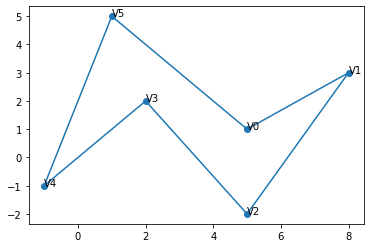

In [58]:
P = [(5,1), (8,3), (5,-2), (2,2), (-1,-1), (1,5)]
AP = dc_edge(P)
AP.plot()
for e in AP.s_e:
    print(e)
df = AP.lista()
df